In [8]:
import os
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Import Dataset

In [9]:
local_path='dataset/SeoulBikeData.csv'
auto='auto'

In [10]:
# get current directory
path = os.getcwd()
print("Current Directory", path)
print()
 
# parent directory
parent = os.path.dirname(path)
print("Parent directory", parent)
print()

# dataset path
dataset_path=os.path.join(parent,local_path)
print("Dataset path",dataset_path)
print()

# auto path
path_auto=os.path.join(parent,auto)
print("Dump path",path_auto)

Current Directory /Users/baptistebeaurain/Google Drive/learning/Python/polars_explo/project/bike_sharing/notebook

Parent directory /Users/baptistebeaurain/Google Drive/learning/Python/polars_explo/project/bike_sharing

Dataset path /Users/baptistebeaurain/Google Drive/learning/Python/polars_explo/project/bike_sharing/dataset/SeoulBikeData.csv

Dump path /Users/baptistebeaurain/Google Drive/learning/Python/polars_explo/project/bike_sharing/auto


In [11]:
df=pd.read_csv(dataset_path)

print("shape:", df.shape)

df.head(5)

shape: (8760, 14)


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Challenges

 ## Compare the average number of bikes rented by the time of day (morning, afternoon, and evening) across the four different seasons.

### Group By Time of the day and Season

In [12]:
# Define the bins and labels for categorization
bins = [0, 5, 12, 18,23]  # Specify your bin edges
labels = ['night', 'morning', 'afternoon','evening']  # Specify your category labels

# Use the cut function to categorize values and create a new column
df['time_day'] = pd.cut(df['Hour'], bins=bins, labels=labels, include_lowest=True)

# Group by
group_by=['Seasons','time_day']

df_group=df.groupby(group_by)['Rented Bike Count'].agg(['mean', 'std']).reset_index()

df_group.head(10)

/var/folders/07/v1ngwnc136b1lhw5lqnq_fjw0000gn/T/ipykernel_58385/1027440317.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group=df.groupby(group_by)['Rented Bike Count'].agg(['mean', 'std']).reset_index()


,Seasons,time_day,mean,std
0,Autumn,night,326.505495,261.853452
1,Autumn,morning,736.281005,535.386293
2,Autumn,afternoon,1195.360806,726.299592
3,Autumn,evening,1077.037363,618.743014
4,Spring,night,243.077899,208.004073
5,Spring,morning,652.363354,468.945332
6,Spring,afternoon,1125.240942,688.319286
7,Spring,evening,948.858696,631.748285
8,Summer,night,486.001812,308.188457
9,Summer,morning,872.077640,477.000651


### Display in a bar chart

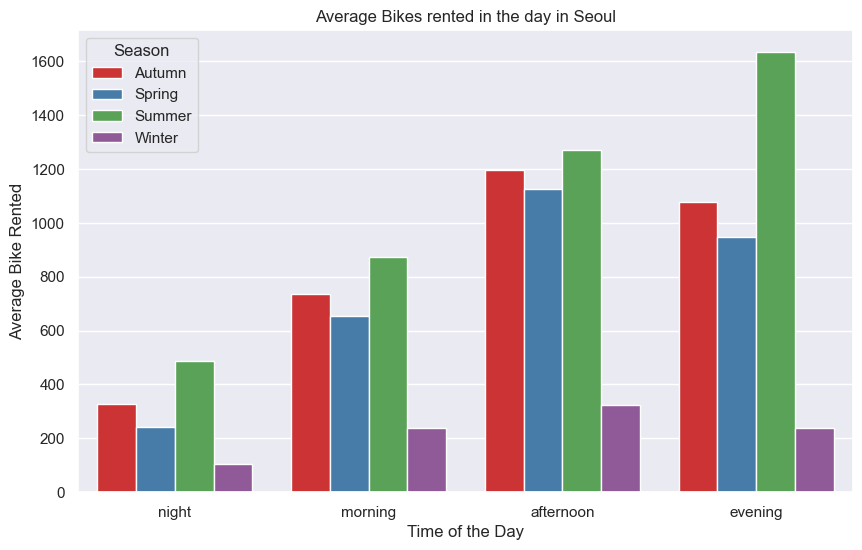

In [13]:
# Set the style for seaborn (optional)
sns.set(style="darkgrid")

# Use Seaborn to create a lineplot for each group
plt.figure(figsize=(10, 6))
bar_plot =sns.barplot(x='time_day', y='mean', hue='Seasons', data=df_group, palette='Set1')

# Set plot labels and title
plt.xlabel('Time of the Day')
plt.ylabel('Average Bike Rented')
plt.title('Average Bikes rented in the day in Seoul')

# Show the legend
plt.legend(title='Season')

# Show the plot
plt.show()

## Show link between temperature and Bike Rental

### Group Data

In [14]:
df_temp=df[['Seasons','Temperature(C)','Rented Bike Count']]

print(df_temp.shape)
df_temp.head(5)

(8760, 3)


,Seasons,Temperature(C),Rented Bike Count
0,Winter,-5.2,254
1,Winter,-5.5,204
2,Winter,-6.0,173
3,Winter,-6.2,107
4,Winter,-6.0,78


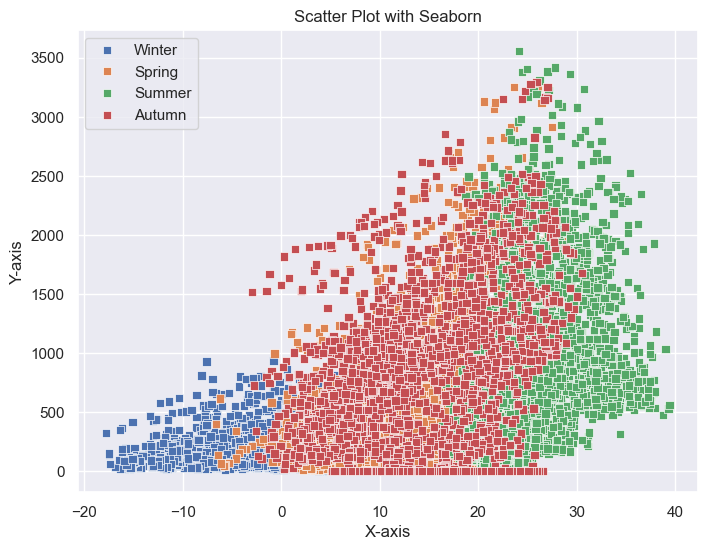

In [15]:
# Seaborn scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature(C)', y='Rented Bike Count', data=df_temp, hue='Seasons', color='red', marker='s')
plt.title('Scatter Plot with Seaborn')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

### Exclude Holiday and Week ends

In [16]:
# Get week day
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Weekday'] = df['Date'].dt.weekday

# Exclude Weekend and holiday, and only keep selected columns
df_temp2=df.loc[(df['Holiday'] == 'No Holiday') & (df['Weekday'] < 5), ['Seasons','Temperature(C)','Rented Bike Count']]

print(df_temp2.shape)
df_temp2.head(5)

(5928, 3)


,Seasons,Temperature(C),Rented Bike Count
0,Winter,-5.2,254
1,Winter,-5.5,204
2,Winter,-6.0,173
3,Winter,-6.2,107
4,Winter,-6.0,78


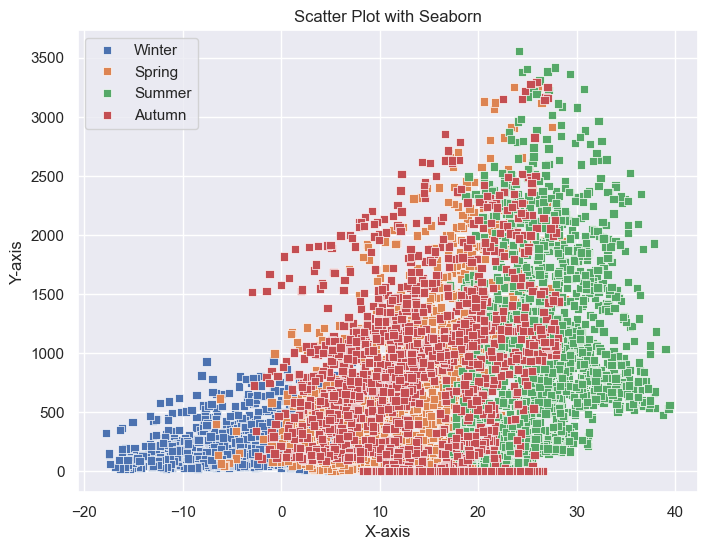

In [17]:
# Seaborn scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature(C)', y='Rented Bike Count', data=df_temp2, hue='Seasons', color='red', marker='s')
plt.title('Scatter Plot with Seaborn')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

## Find Correlations

In [18]:
# Perform one-hot encoding on the 'Season' column

df_encoded = pd.get_dummies(df, columns=['time_day','Seasons','Holiday','Functioning Day'])
df_encoded=df_encoded.drop('Date', axis=1)

df_encoded.to_csv(os.path.join(path_auto,'df_encoded.csv'))

df_encoded.head(5)

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,time_day_afternoon,time_day_evening,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,False,False,False,False,False,True,False,True,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,False,False,False,False,False,True,False,True,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,False,False,False,False,False,True,False,True,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,False,False,False,False,False,True,False,True,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,False,False,False,False,False,True,False,True,False,True


In [19]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Save Correlation Matrix
correlation_matrix.to_csv(os.path.join(path_auto,'corr.csv'))

                          Rented Bike Count          Hour  Temperature(C)  \
Rented Bike Count                  1.000000  4.102573e-01        0.538558   
Hour                               0.410257  1.000000e+00        0.124114   
Temperature(C)                     0.538558  1.241145e-01        1.000000   
Humidity(%)                       -0.199780 -2.416438e-01        0.159371   
Wind speed (m/s)                   0.121108  2.851967e-01       -0.036252   
Visibility (10m)                   0.199280  9.875348e-02        0.034794   
Dew point temperature(C)           0.379788  3.054372e-03        0.912798   
Solar Radiation (MJ/m2)            0.261837  1.451309e-01        0.353505   
Rainfall(mm)                      -0.123074  8.714642e-03        0.050282   
Snowfall (cm)                     -0.141804 -2.151645e-02       -0.218405   
Weekday                           -0.029357  8.797335e-18       -0.003368   
time_day_night                    -0.370501 -7.506519e-01       -0.116072   

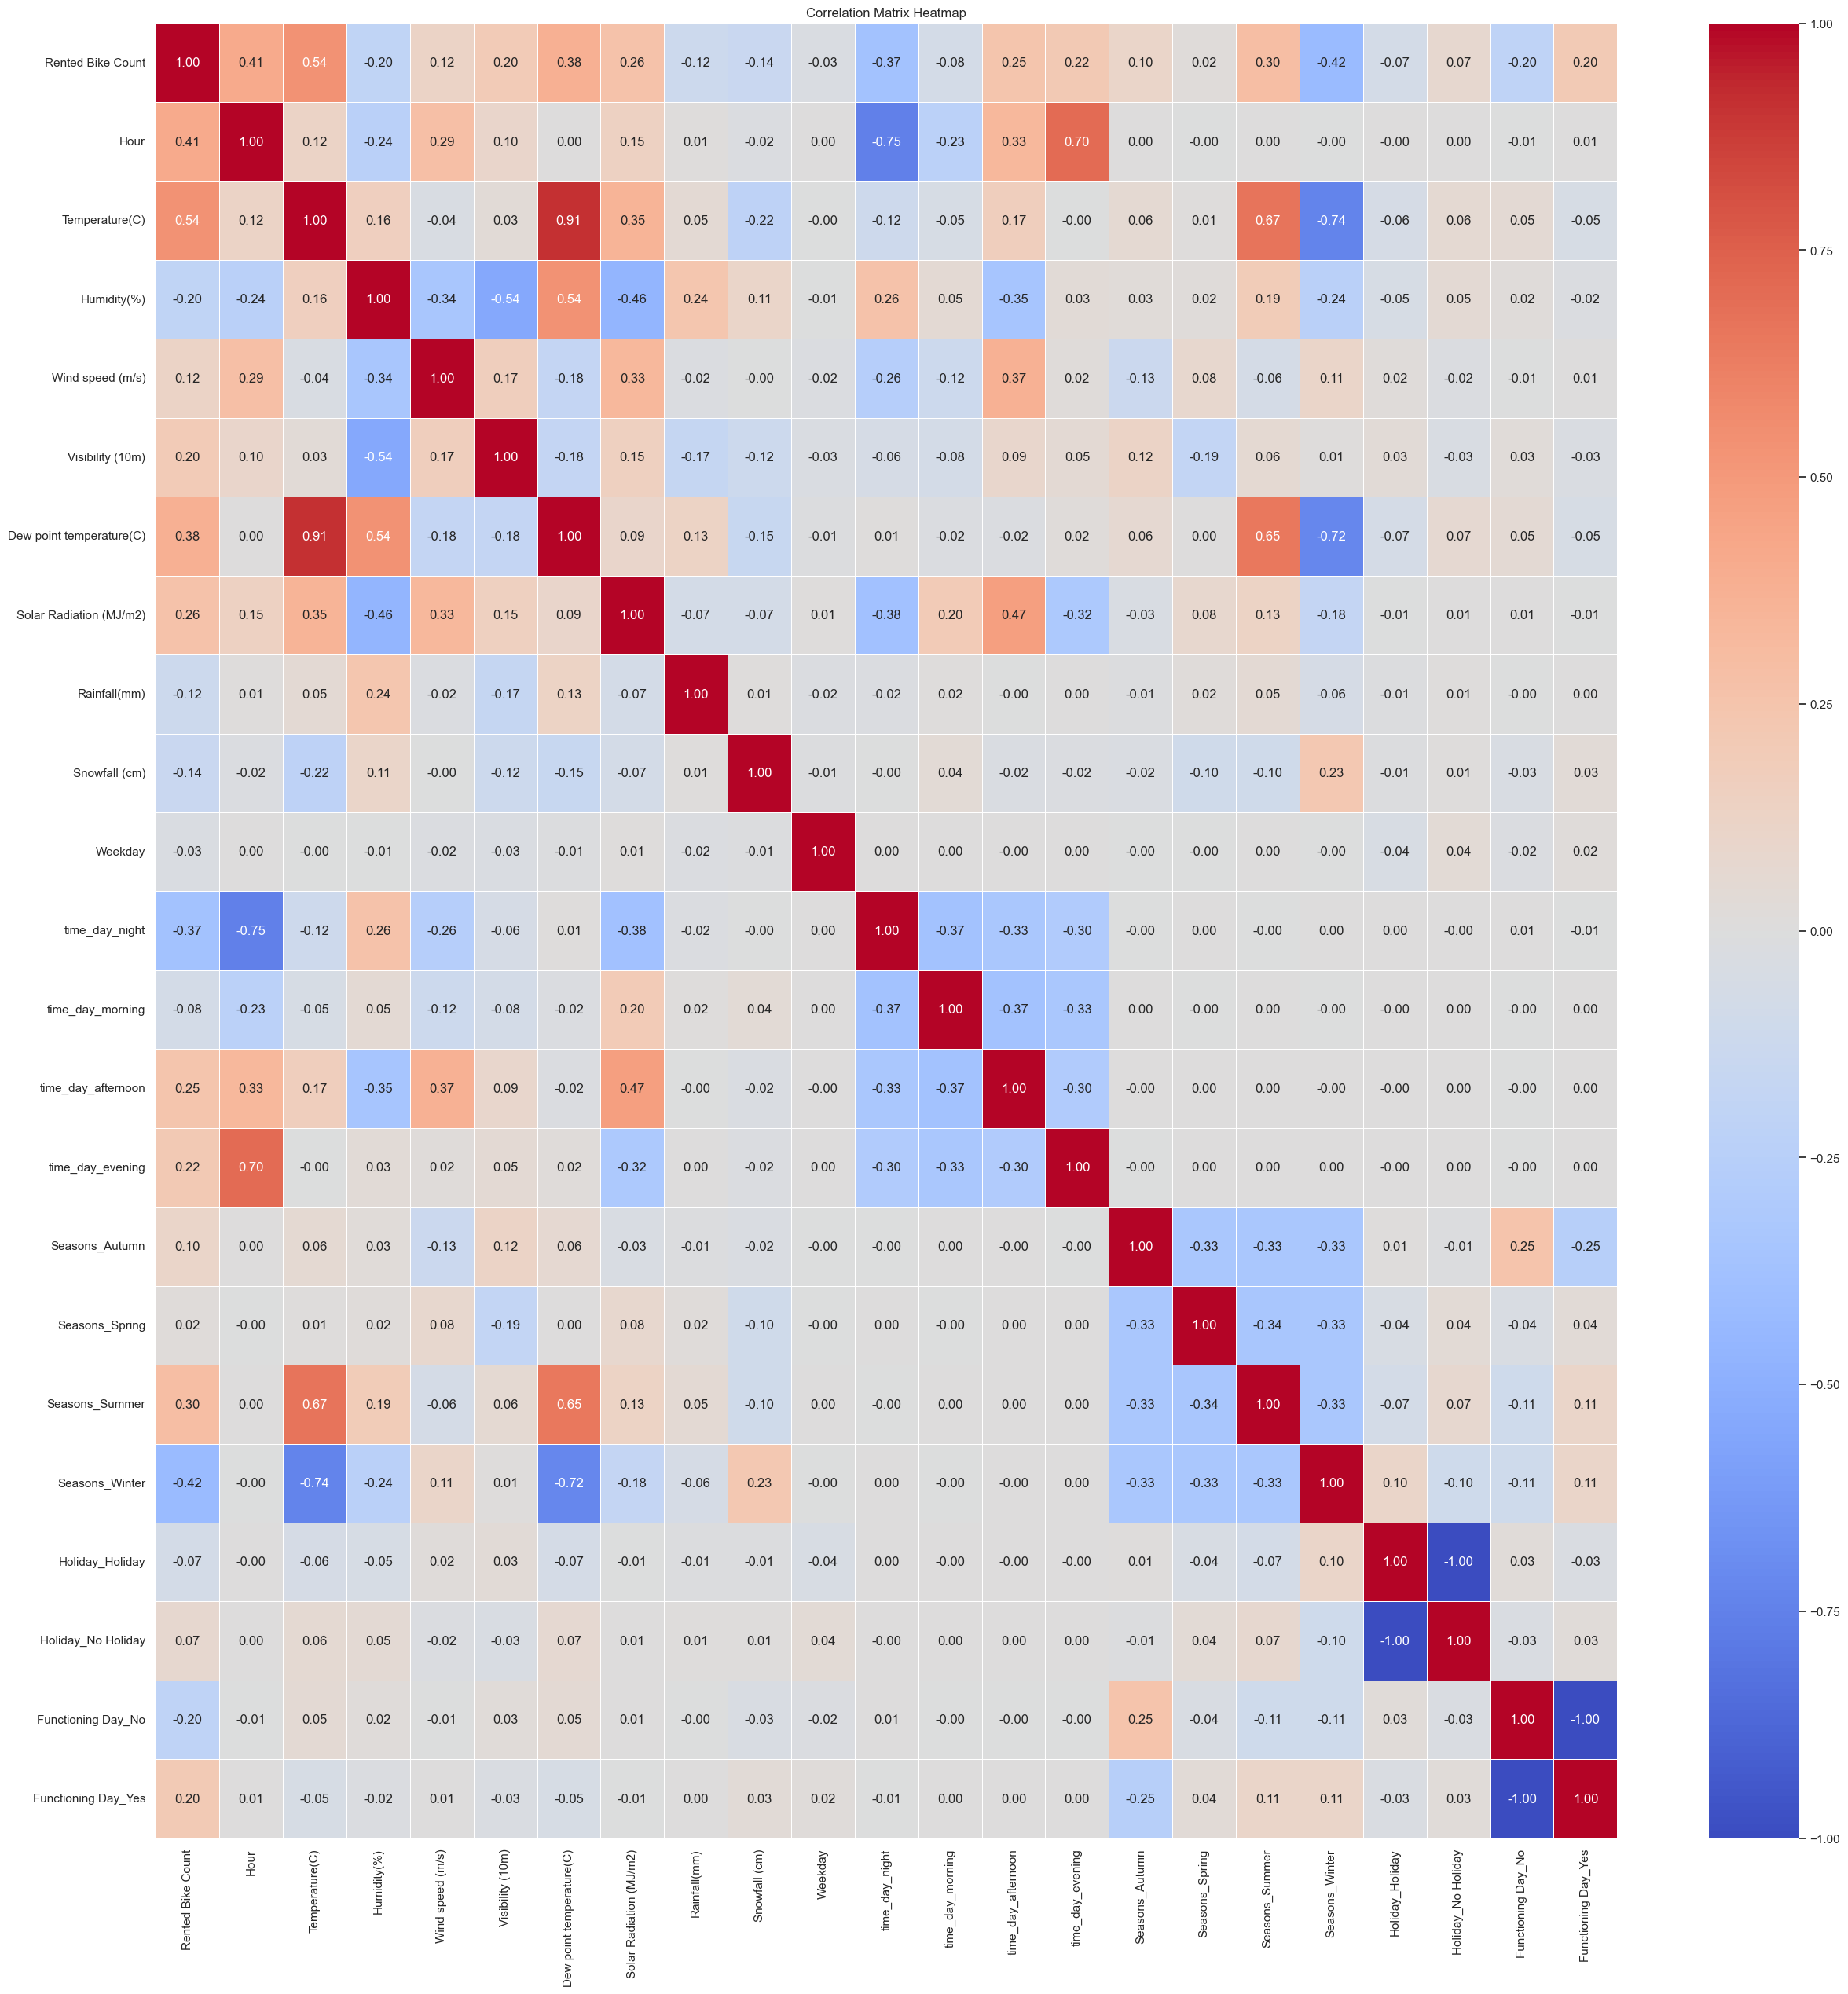

In [20]:
# Create a heatmap using seaborn
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

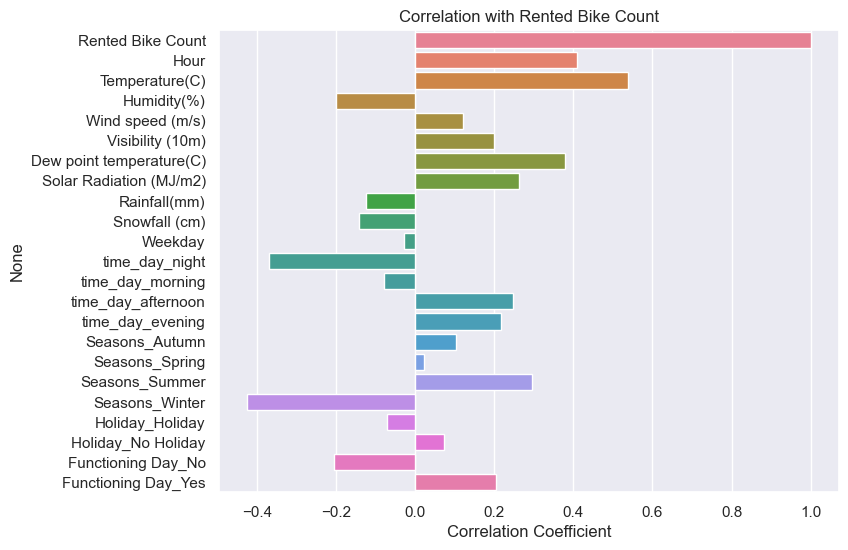

In [21]:
# Specify the feature for which you want to visualize the correlation
feature_to_visualize = 'Rented Bike Count'

# Calculate the correlation with the chosen feature
correlation_with_feature = df_encoded.corr()[feature_to_visualize]

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_feature.values, y=correlation_with_feature.index, hue=correlation_with_feature.index, legend=False)
plt.title(f'Correlation with {feature_to_visualize}')
plt.xlabel('Correlation Coefficient')
plt.show()